In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import itertools
import seaborn as sns
import pandas_profiling
import statsmodels.formula.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

c:\users\manasa\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [3]:
from sklearn import datasets
from sklearn.feature_selection import RFE
import sklearn.metrics as metrics
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

In [4]:
train=pd.read_csv('NSL_Dataset/Train.txt',sep=',')
test=pd.read_csv('NSL_Dataset/Test.txt',sep=',')


In [5]:
train.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17.1,0.03,0.17.2,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [6]:
columns=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land",
"wrong_fragment","urgent","hot","num_failed_logins","logged_in",
"num_compromised","root_shell","su_attempted","num_root","num_file_creations",
"num_shells","num_access_files","num_outbound_cmds","is_host_login",
"is_guest_login","count","srv_count","serror_rate", "srv_serror_rate",
"rerror_rate","srv_rerror_rate","same_srv_rate", "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate",
"dst_host_diff_srv_rate","dst_host_same_src_port_rate",
"dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
"dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]

In [7]:
train.columns=columns
test.columns=columns

In [8]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [9]:
test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21


In [10]:
train['attack'].value_counts()

normal             67342
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: attack, dtype: int64

In [11]:
test['attack'].value_counts()

normal             9711
neptune            4656
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetattack       178
portsweep           157
ipsweep             141
httptunnel          133
nmap                 73
pod                  41
buffer_overflow      20
multihop             18
named                17
ps                   15
sendmail             14
xterm                13
rootkit              13
teardrop             12
xlock                 9
land                  7
xsnoop                4
ftp_write             3
phf                   2
sqlattack             2
udpstorm              2
worm                  2
perl                  2
loadmodule            2
imap                  1
Name: attack, dtype: int64

Mutinomial Classification
In attack_class normal means 0, DOS means 1, PROBE means 2, R2L means 3 and U2R means 4.

In [12]:
train['attack_class']=np.where(train.attack=='normal',0,np.where((train.attack=='back') | (train.attack=='land') | (train.attack=='pod') | (train.attack=='neptune') | 
         (train.attack=='smurf') | (train.attack=='teardrop') | (train.attack=='apache2') | (train.attack=='udpstorm') | 
         (train.attack=='processtable') | (train.attack=='worm') | (train.attack=='mailbomb'),1,np.where((train.attack=='satan') | (train.attack=='ipsweep') | (train.attack=='nmap') | (train.attack=='portsweep') | 
          (train.attack=='mscan') | (train.attack=='saint'),2,np.where((train.attack=='guess_passwd') | (train.attack=='ftp_write') | (train.attack=='imap') | (train.attack=='phf') | 
          (train.attack=='multihop') | (train.attack=='warezmaster') | (train.attack=='warezclient') | (train.attack=='spy') | 
          (train.attack=='xlock') | (train.attack=='xsnoop') | (train.attack=='snmpguess') | (train.attack=='snmpgetattack') | 
          (train.attack=='httptunnel') | (train.attack=='sendmail') | (train.attack=='named'),3,4))))

In [13]:
test['attack_class']=np.where(test.attack=='normal',0,np.where((test.attack=='back') | (test.attack=='land') | (test.attack=='pod') | (test.attack=='neptune') | 
         (test.attack=='smurf') | (test.attack=='teardrop') | (test.attack=='apache2') | (test.attack=='udpstorm') | 
         (test.attack=='processtable') | (test.attack=='worm') | (test.attack=='mailbomb'),1,np.where((test.attack=='satan') | (test.attack=='ipsweep') | (test.attack=='nmap') | (test.attack=='portsweep') | 
          (test.attack=='mscan') | (test.attack=='saint'),2,np.where((test.attack=='guess_passwd') | (test.attack=='ftp_write') | (test.attack=='imap') | (test.attack=='phf') | 
          (test.attack=='multihop') | (test.attack=='warezmaster') | (test.attack=='warezclient') | (test.attack=='spy') | 
          (test.attack=='xlock') | (test.attack=='xsnoop') | (test.attack=='snmpguess') | (test.attack=='snmpgetattack') | 
          (test.attack=='httptunnel') | (test.attack=='sendmail') | (test.attack=='named'),3,4))))

Binomial Classification
In attack_class normal means 0 and attack means 1.

In [14]:
train['attack_class']=np.where(train.attack=='normal',0,1)

In [15]:
train.attack_class.value_counts()

0    67342
1    58630
Name: attack_class, dtype: int64

In [16]:
test['attack_class']=np.where(test.attack=='normal',0,1)

In [17]:
test.attack_class.value_counts()

1    12832
0     9711
Name: attack_class, dtype: int64

# **Basic Exploratory Analysis**

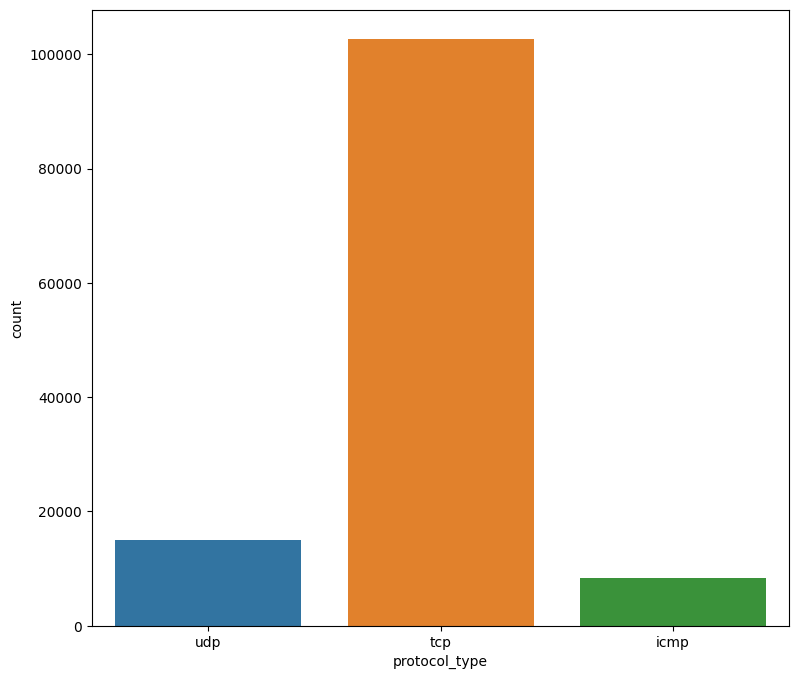

In [18]:
# Protocol type distribution
plt.figure(figsize=(9,8))
sns.countplot(x="protocol_type", data=train)
plt.show()

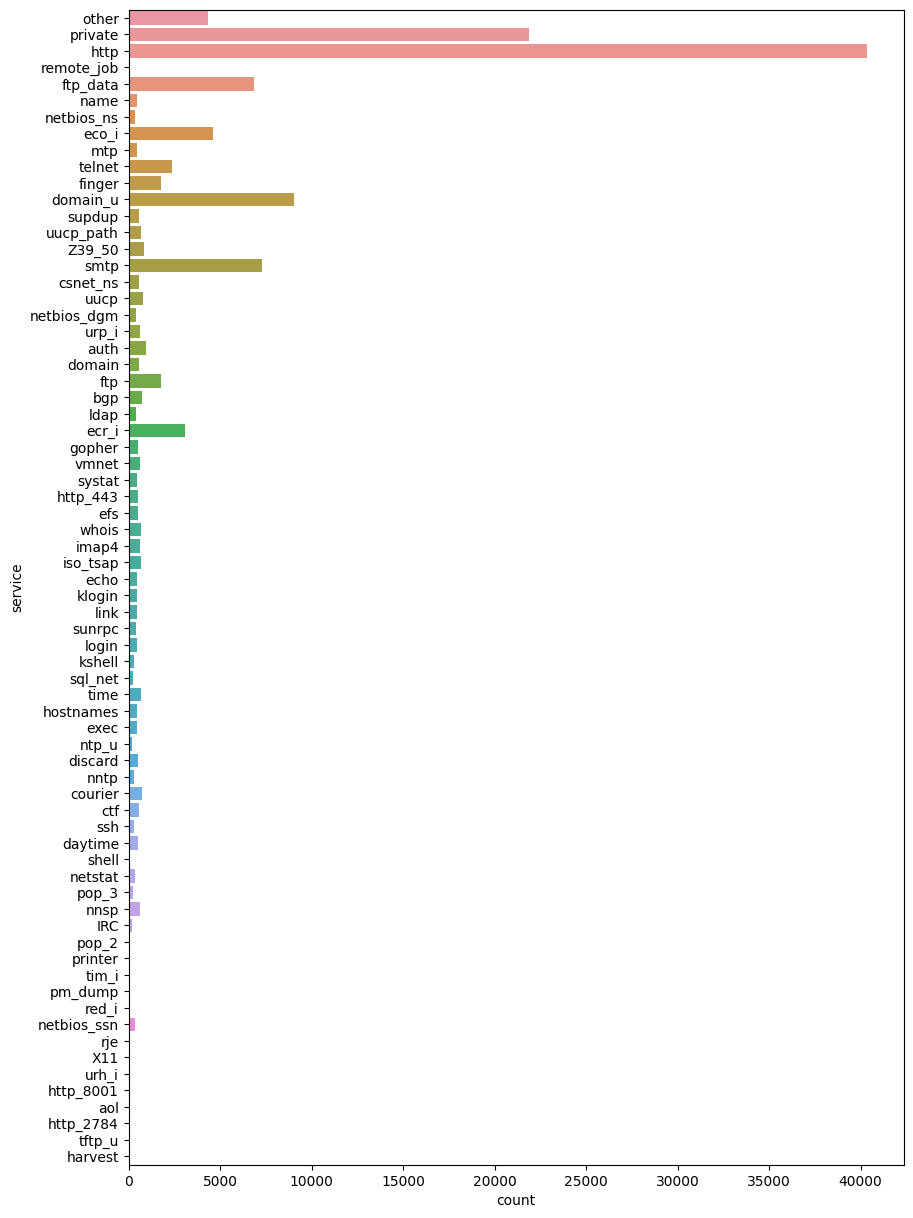

In [19]:
# Protocol type distribution
plt.figure(figsize=(10,15))
sns.countplot(y="service", data=train)
plt.show()

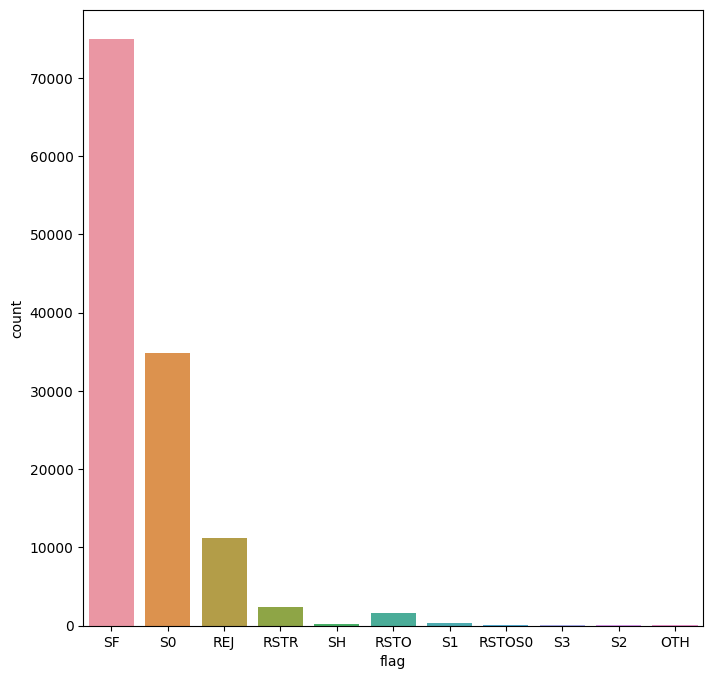

In [20]:
# Protocol type distribution
plt.figure(figsize=(8,8))
sns.countplot(x="flag", data=train)
plt.show()

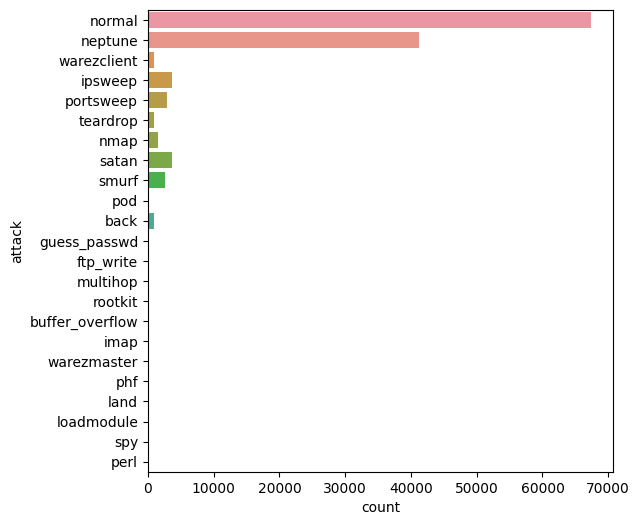

In [21]:
# Protocol type distribution
plt.figure(figsize=(6,6))
sns.countplot(y="attack", data=train)
plt.show()

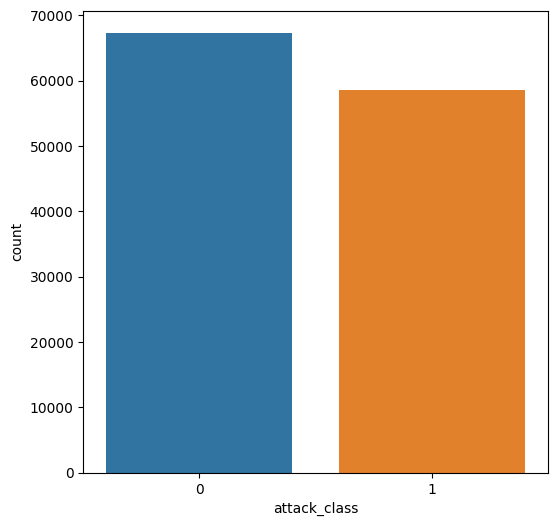

In [22]:
# Protocol type distribution
plt.figure(figsize=(6,6))
sns.countplot(x="attack_class", data=train)
plt.show()

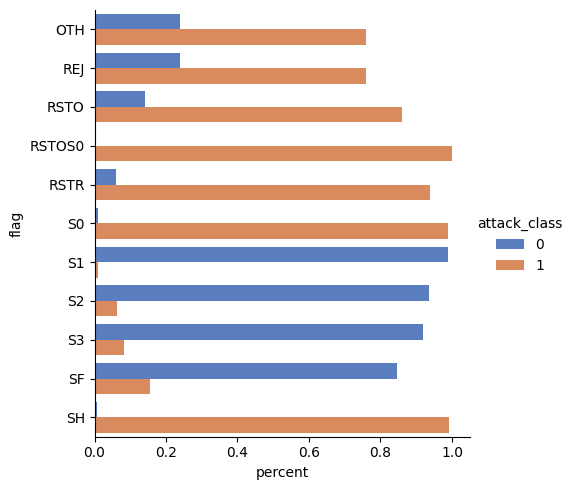

In [23]:
flag_count = train[['flag', 'attack_class']].groupby(['flag', 'attack_class']).size()
flag_count_percent = flag_count.groupby(level=[0]).apply(lambda x: x / x.sum()).reset_index()
flag_count_percent.columns = ['flag', 'attack_class', 'percent']
sns.catplot(y="flag",
            x = 'percent',
            hue="attack_class",
            data = flag_count_percent,
            kind="bar",
            palette="muted")

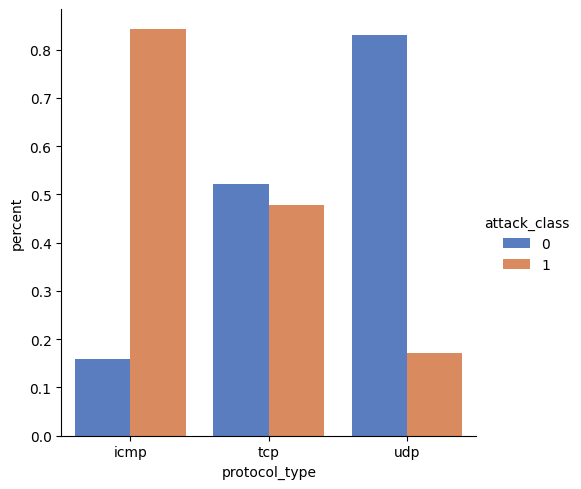

In [24]:
type_count = train[['protocol_type', 'attack_class']].groupby(['protocol_type', 'attack_class']).size()
type_count_percent = type_count.groupby(level=[0]).apply(lambda x: x / x.sum()).reset_index()
type_count_percent.columns = ['protocol_type', 'attack_class', 'percent']
sns.catplot(x="protocol_type",
            y = 'percent',
            hue="attack_class",
            data = type_count_percent,
            kind="bar",
            palette="muted")

identifying relationships (between Y & numerical independent variables by comparing means)

In [25]:
train.groupby('attack_class').mean().T

attack_class,0,1
duration,168.589899,423.320689
src_bytes,13133.467064,82820.141327
dst_bytes,4329.749517,37524.482159
land,0.000104,0.000307
wrong_fragment,0.000000,0.048746
urgent,0.000148,0.000068
hot,0.230658,0.174262
num_failed_logins,0.001381,0.001040
logged_in,0.710656,0.034027
num_compromised,0.507083,0.017568


In [26]:

# 13. Lets check corrleation between Variables
corrmat = train.corr()
corrmat

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag,attack_class
duration,1.000000,0.070737,0.034878,-0.001553,-0.009866,0.003830,0.000705,0.009528,-0.064219,0.042679,...,-0.116006,0.254195,0.228737,-0.026670,-0.064949,-0.064361,0.173815,0.199023,-0.156310,0.048785
src_bytes,0.070737,1.000000,0.000204,-0.000109,-0.000693,-0.000059,0.000295,-0.000208,-0.003353,-0.000086,...,-0.006572,0.000900,0.000431,-0.001655,-0.004503,-0.003397,-0.001468,0.012449,-0.022592,0.005921
dst_bytes,0.034878,0.000204,1.000000,-0.000069,-0.000440,0.000248,-0.000344,0.000504,-0.002894,0.001233,...,-0.004424,0.011031,0.011747,-0.001281,-0.003024,-0.002944,0.011729,0.011223,-0.018076,0.004118
land,-0.001553,-0.000109,-0.000069,1.000000,-0.001261,-0.000109,-0.001340,-0.000381,-0.011402,-0.000164,...,0.011597,-0.004516,0.033851,0.070474,0.019840,0.012276,-0.005222,-0.005303,-0.037038,0.007191
wrong_fragment,-0.009866,-0.000693,-0.000440,-0.001261,1.000000,-0.000692,-0.008508,-0.002418,-0.072419,-0.001044,...,-0.048734,0.059796,0.037177,-0.016252,-0.051917,-0.055918,0.028890,-0.033682,-0.157130,0.095905
urgent,0.003830,-0.000059,0.000248,-0.000109,-0.000692,1.000000,0.000293,0.097507,0.007299,0.033329,...,-0.004489,0.006840,0.002741,0.005176,-0.004749,-0.004834,-0.002999,-0.002912,-0.016411,-0.002787
hot,0.000705,0.000295,-0.000344,-0.001340,-0.008508,0.000293,1.000000,0.003715,0.116435,0.002013,...,-0.036294,-0.012293,-0.034536,-0.024715,-0.058223,-0.058215,-0.030555,-0.031670,-0.160013,-0.013084
num_failed_logins,0.009528,-0.000208,0.000504,-0.000381,-0.002418,0.097507,0.003715,1.000000,-0.006439,0.019085,...,-0.001576,-0.001945,-0.005526,0.003302,-0.011648,-0.012299,0.018660,0.017359,-0.073178,-0.003755
logged_in,-0.064219,-0.003353,-0.002894,-0.011402,-0.072419,0.007299,0.116435,-0.006439,1.000000,0.014413,...,0.604056,-0.256067,-0.160994,-0.055955,-0.491484,-0.493270,-0.275974,-0.272809,0.269820,-0.690181
num_compromised,0.042679,-0.000086,0.001233,-0.000164,-0.001044,0.033329,0.002013,0.019085,0.014413,1.000000,...,-0.004995,0.002981,-0.002045,0.004252,-0.004377,-0.004898,-0.003647,-0.003219,-0.006101,-0.010198


Data Audit

In [27]:
tr_num_var=train.select_dtypes(['int64','float64','int32','float32'])
ts_num_var=test.select_dtypes(['int64','float64','int32','float32'])

In [28]:
tr_cat_var = train.select_dtypes('object')
ts_cat_var=test.select_dtypes('object')

In [29]:
# Create Data audit Report for continuous variables
def continuous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  
                      x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),
                          x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [30]:
# Create Data audit Report for categorical variables
def categorical_var_summary(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100/x.count(), 2)], 
                  index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])

In [31]:
# An utility function to create dummy variable
def create_dummies(df, colname):
    col_dummies = pd.get_dummies(df[colname], prefix = colname, drop_first = True)
    df = pd.concat([df, col_dummies], axis = 1)
    df.drop(colname, axis = 1, inplace = True )
    return df

In [32]:
tr_num_var.apply(continuous_var_summary).T.round(2)
ts_num_var.apply(continuous_var_summary).T.round(2)

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
duration,22543.0,0.0,4.933959e+06,218.87,0.00,1407.21,1.980232e+06,0.0,0.0,0.00,0.00,0.00,0.00,0.00,4.00,283.00,7589.58,57715.0
src_bytes,22543.0,0.0,2.343550e+08,10395.91,54.00,472796.91,2.235369e+11,0.0,0.0,0.00,0.00,0.00,54.00,287.00,1032.00,15876.00,283618.00,62825648.0
dst_bytes,22543.0,0.0,4.635089e+07,2056.11,46.00,21219.76,4.502784e+08,0.0,0.0,0.00,0.00,0.00,46.00,601.00,4099.40,8314.00,26032.76,1345927.0
land,22543.0,0.0,7.000000e+00,0.00,0.00,0.02,0.000000e+00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0
wrong_fragment,22543.0,0.0,1.900000e+02,0.01,0.00,0.14,2.000000e-02,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.0
urgent,22543.0,0.0,1.600000e+01,0.00,0.00,0.04,0.000000e+00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.0
hot,22543.0,0.0,2.376000e+03,0.11,0.00,0.93,8.600000e-01,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,101.0
num_failed_logins,22543.0,0.0,4.880000e+02,0.02,0.00,0.15,2.000000e-02,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,4.0
logged_in,22543.0,0.0,9.969000e+03,0.44,0.00,0.50,2.500000e-01,0.0,0.0,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.0
num_compromised,22543.0,0.0,2.703000e+03,0.12,0.00,7.27,5.285000e+01,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,796.0


In [33]:
# alternate of .describe() for categorical variables
tr_cat_var.apply(categorical_var_summary).T
ts_cat_var.apply(categorical_var_summary).T

,N,NMISS,MODE,FREQ,PERCENT
protocol_type,22543,0,tcp,18879,83.75
service,22543,0,http,7853,34.84
flag,22543,0,SF,14875,65.99
attack,22543,0,normal,9711,43.08


In [34]:
tr_num_var.apply(continuous_var_summary).T.round(2)
ts_num_var.apply(continuous_var_summary).T.round(2)

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
duration,22543.0,0.0,4.933959e+06,218.87,0.00,1407.21,1.980232e+06,0.0,0.0,0.00,0.00,0.00,0.00,0.00,4.00,283.00,7589.58,57715.0
src_bytes,22543.0,0.0,2.343550e+08,10395.91,54.00,472796.91,2.235369e+11,0.0,0.0,0.00,0.00,0.00,54.00,287.00,1032.00,15876.00,283618.00,62825648.0
dst_bytes,22543.0,0.0,4.635089e+07,2056.11,46.00,21219.76,4.502784e+08,0.0,0.0,0.00,0.00,0.00,46.00,601.00,4099.40,8314.00,26032.76,1345927.0
land,22543.0,0.0,7.000000e+00,0.00,0.00,0.02,0.000000e+00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0
wrong_fragment,22543.0,0.0,1.900000e+02,0.01,0.00,0.14,2.000000e-02,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.0
urgent,22543.0,0.0,1.600000e+01,0.00,0.00,0.04,0.000000e+00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.0
hot,22543.0,0.0,2.376000e+03,0.11,0.00,0.93,8.600000e-01,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,101.0
num_failed_logins,22543.0,0.0,4.880000e+02,0.02,0.00,0.15,2.000000e-02,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,4.0
logged_in,22543.0,0.0,9.969000e+03,0.44,0.00,0.50,2.500000e-01,0.0,0.0,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.0
num_compromised,22543.0,0.0,2.703000e+03,0.12,0.00,7.27,5.285000e+01,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,796.0


In [35]:
# get the useful categorical variables
tr_cat_var = train[['protocol_type', 'service','flag','attack']]

# for c_feature in categorical_features
for c_feature in ['protocol_type', 'service','flag','attack']:
    tr_cat_var[c_feature] = tr_cat_var[c_feature].astype('category')
    tr_cat_var = create_dummies(tr_cat_var, c_feature)

c:\users\manasa\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [36]:
# get the useful categorical variables
ts_cat_var = test[['protocol_type', 'service','flag','attack']]

# for c_feature in categorical_features
for c_feature in ['protocol_type', 'service','flag','attack']:
    ts_cat_var[c_feature] = ts_cat_var[c_feature].astype('category')
    ts_cat_var = create_dummies(ts_cat_var, c_feature)


c:\users\manasa\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Final datasets

In [37]:
train_new= pd.concat([tr_num_var, tr_cat_var], axis = 1)
test_new = pd.concat([ts_num_var, ts_cat_var], axis = 1)

In [38]:
corrm=train_new.corr()
corrm

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,attack_phf,attack_pod,attack_portsweep,attack_rootkit,attack_satan,attack_smurf,attack_spy,attack_teardrop,attack_warezclient,attack_warezmaster
duration,1.000000,0.070737,0.034878,-0.001553,-0.009866,0.003830,0.000705,0.009528,-0.064219,0.042679,...,-0.000612,-0.004407,0.471677,-0.000637,-0.018990,-0.016149,0.000047,-0.009310,0.013536,-0.001316
src_bytes,0.070737,1.000000,0.000204,-0.000109,-0.000693,-0.000059,0.000295,-0.000208,-0.003353,-0.000086,...,-0.000044,-0.000300,0.039127,-0.000069,-0.001338,-0.001114,-0.000031,-0.000655,0.004288,-0.000098
dst_bytes,0.034878,0.000204,1.000000,-0.000069,-0.000440,0.000248,-0.000344,0.000504,-0.002894,0.001233,...,-0.000016,-0.000197,0.026878,-0.000034,-0.000847,-0.000720,-0.000018,-0.000415,-0.000398,0.012228
land,-0.001553,-0.000109,-0.000069,1.000000,-0.001261,-0.000109,-0.001340,-0.000381,-0.011402,-0.000164,...,-0.000079,-0.000563,-0.002174,-0.000126,-0.002428,-0.002064,-0.000056,-0.001190,-0.001188,-0.000178
wrong_fragment,-0.009866,-0.000693,-0.000440,-0.001261,1.000000,-0.000692,-0.008508,-0.002418,-0.072419,-0.001044,...,-0.000504,0.151750,-0.013812,-0.000797,-0.015421,-0.013108,-0.000357,0.985733,-0.007548,-0.001128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
attack_smurf,-0.016149,-0.001114,-0.000720,-0.002064,-0.013108,-0.001133,-0.013926,-0.003958,-0.118539,-0.001708,...,-0.000825,-0.005856,-0.022607,-0.001305,-0.025242,1.000000,-0.000584,-0.012370,-0.012356,-0.001846
attack_spy,0.000047,-0.000031,-0.000018,-0.000056,-0.000357,-0.000031,-0.000379,-0.000108,0.000850,-0.000046,...,-0.000022,-0.000159,-0.000615,-0.000036,-0.000687,-0.000584,1.000000,-0.000336,-0.000336,-0.000050
attack_teardrop,-0.009310,-0.000655,-0.000415,-0.001190,0.985733,-0.000653,-0.008029,-0.002282,-0.068341,-0.000985,...,-0.000476,-0.003376,-0.013034,-0.000752,-0.014553,-0.012370,-0.000336,1.000000,-0.007123,-0.001064
attack_warezclient,0.013536,0.004288,-0.000398,-0.001188,-0.007548,-0.000653,0.352671,-0.002279,0.104233,-0.000984,...,-0.000475,-0.003372,-0.013019,-0.000752,-0.014536,-0.012356,-0.000336,-0.007123,1.000000,-0.001063


<AxesSubplot:>

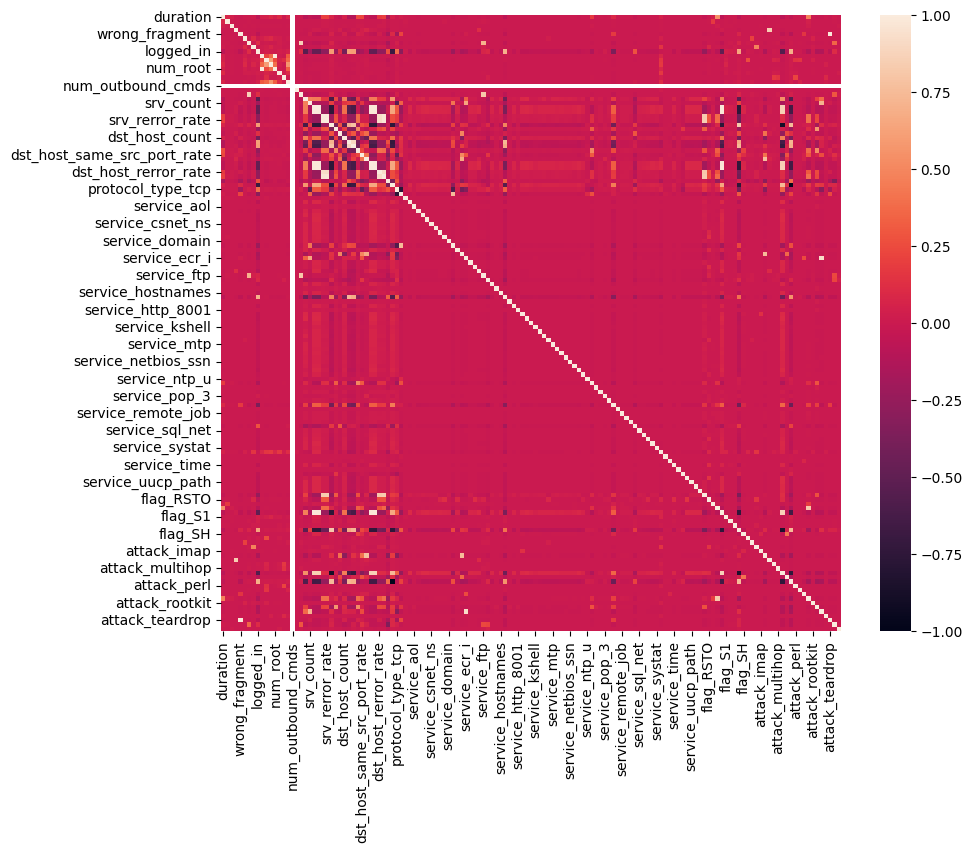

In [39]:
plt.figure(figsize = (10, 8))
sns.heatmap(corrm)

In [40]:
train_new.drop(columns=['land','wrong_fragment','urgent','num_failed_logins',"root_shell","su_attempted","num_root",
                        "num_file_creations","num_shells","num_access_files","num_outbound_cmds","is_host_login","is_guest_login",
                        'dst_host_rerror_rate','dst_host_serror_rate','dst_host_srv_rerror_rate','dst_host_srv_serror_rate',
                        'num_root','num_outbound_cmds','srv_rerror_rate','srv_serror_rate'],inplace=True)

<AxesSubplot:>

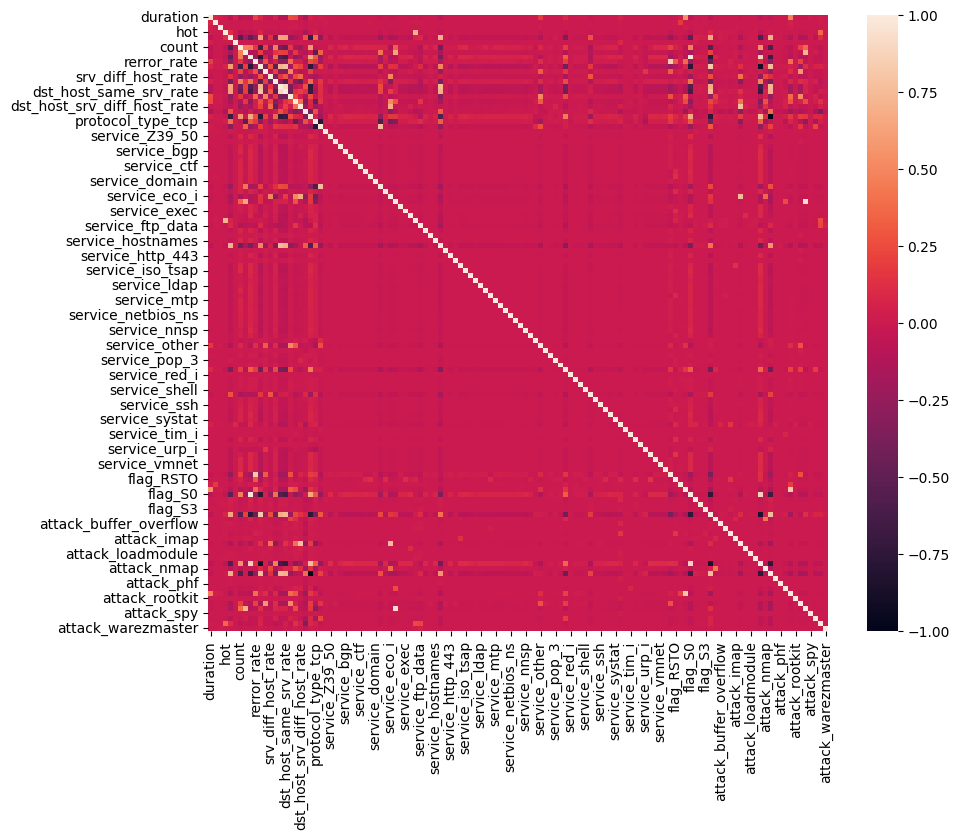

In [41]:
plt.figure(figsize = (10, 8))
sns.heatmap(train_new.corr())

 Recursive Feature Elimination (RFE)

In [42]:
import warnings
warnings.filterwarnings("ignore")
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
X = train_new[train_new.columns.difference(['attack_class'])]
logreg = LogisticRegression(solver='lbfgs',multi_class='auto')
rfe = RFE(logreg, 15)
rfe = rfe.fit(X, train_new['attack_class'] )
print(rfe.support_)
print(rfe.ranking_)

AttributeError: 'str' object has no attribute 'decode'

In [ ]:
# capturing the important variables
RFE_features=X.columns[rfe.get_support()]
RFE_features

In [ ]:
all_columns = "+".join(train_new.columns.difference( ['attack_class'] ))

print(all_columns)

Variance Inflation Factor assessment

In [ ]:
# import the packages for vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
# run the dmatrices
a, b = dmatrices(formula_like='''attack_class ~ count+diff_srv_rate+dst_bytes+dst_host_count+
                 dst_host_diff_srv_rate+dst_host_same_src_port_rate+
                 dst_host_srv_diff_host_rate+duration+
                 hot+last_flag+logged_in+num_compromised+
                srv_count+srv_diff_host_rate''', data =train_new, return_type = 'dataframe')

# get the VIF
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif["features"] = b.columns

vif

Final Variables

In [ ]:
cols=['count','diff_srv_rate','dst_bytes','dst_host_count',
                 'dst_host_diff_srv_rate','dst_host_same_src_port_rate',
                 'dst_host_srv_diff_host_rate','duration',
                 'hot','last_flag','logged_in','num_compromised',
                 'srv_count','srv_diff_host_rate']

Model Building

In [ ]:
train_X=train_new[cols]
train_y=train_new['attack_class']
test_X=test_new[cols]
test_y=test_new['attack_class']

Logistic Regression

In [ ]:
# Building Models
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=0,solver='lbfgs',multi_class='multinomial')
logreg.fit( train_X, train_y)
logreg.predict(train_X)   #by default, it use cut-off as 0.5

In [ ]:
list( zip( cols, logreg.coef_[0] ) )

In [ ]:

logreg.intercept_


In [ ]:
logreg.score(train_X,train_y)

Decision Trees

In [ ]:

train_X.shape

In [ ]:
param_grid = {'max_depth': np.arange(2, 12),
             'max_features': np.arange(10,15)}

In [ ]:
train_y.shape

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export
tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 10,verbose=1,n_jobs=-1)
tree.fit( train_X, train_y )


In [ ]:
tree.best_score_

In [ ]:
tree.best_estimator_
tree.best_params_

In [ ]:
train_pred = tree.predict(train_X)

In [ ]:
print(metrics.classification_report(train_y, train_pred))

In [ ]:
test_pred = tree.predict(test_X)
print(metrics.classification_report(test_y, test_pred))

In [ ]:
clf_tree = DecisionTreeClassifier( max_depth = 11, max_features=13)
clf_tree.fit( train_X, train_y )

In [ ]:
train_X.columns
clf_tree.feature_importances_

In [ ]:
list(zip(train_X.columns,clf_tree.feature_importances_ ))

In [ ]:
tree_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': clf_tree.predict( test_X ) } )

In [ ]:
tree_test_pred.sample( n = 10 )

In [ ]:
metrics.accuracy_score( tree_test_pred.actual, tree_test_pred.predicted )

In [ ]:
tree_cm = metrics.confusion_matrix( tree_test_pred.predicted,
                                 tree_test_pred.actual,
                                 [1,0] )
sns.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["Yes", "No"] , yticklabels = ["Yes", "No"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

In [ ]:
metrics.roc_auc_score( tree_test_pred.actual, tree_test_pred.predicted )

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
pargrid_rf = {'n_estimators': [50,60,70,80,90,100],
                  'max_features': [2,3,4,5,6,7]}

In [ ]:
from sklearn.model_selection import GridSearchCV
gscv_rf = GridSearchCV(estimator=RandomForestClassifier(), 
                        param_grid=pargrid_rf, 
                        cv=10,
                        verbose=True, n_jobs=-1)

gscv_results = gscv_rf.fit(train_X, train_y)

In [ ]:
gscv_results.best_params_

In [ ]:
gscv_rf.best_score_

In [ ]:
radm_clf = RandomForestClassifier(oob_score=True,n_estimators=80, max_features=5, n_jobs=-1)
radm_clf.fit( train_X, train_y )

In [ ]:
radm_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': radm_clf.predict( test_X ) } )

In [ ]:
print(metrics.accuracy_score( radm_test_pred.actual, radm_test_pred.predicted ))
#print(metrics.roc_auc_score( radm_test_pred.actual, radm_test_pred.predicted ))

In [ ]:
tree_cm = metrics.confusion_matrix( radm_test_pred.predicted,
                                 radm_test_pred.actual,
                                 [1,0] )
sns.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["Yes", "No"] , yticklabels = ["Yes", "No"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

Neural Network Model

In [ ]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(train_X)

In [ ]:
# Now apply the transformations to the data:
train_X = scaler.transform(train_X)
test_X = scaler.transform(test_X)

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))
mlp.fit(train_X, train_y)

In [ ]:
predictions = mlp.predict(test_X)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(test_y,predictions))
print(classification_report(test_y,predictions))

In [ ]:
len(mlp.coefs_)
len(mlp.coefs_[0])
len(mlp.intercepts_[0])

In [ ]:
mlp.coefs_

In [ ]:
mlp.score(train_X,train_y)

Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import LinearSVC
svm_clf = LinearSVC(random_state=0, tol=1e-5)
svm_clf.fit(train_X,train_y)

In [ ]:
print(svm_clf.coef_)
print(svm_clf.intercept_)
print(svm_clf.predict(train_X))

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

model = SVC(kernel='rbf', class_weight='balanced',gamma='scale')

In [ ]:
model.fit(train_X,train_y)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 10],
              'gamma': [0.0001, 0.001]}
grid = GridSearchCV(model, param_grid)

grid.fit(train_X,train_y)

In [ ]:
print(grid.best_params_)

In [ ]:
model = grid.best_estimator_
yfit = model.predict(test_X)

In [ ]:

from sklearn.metrics import classification_report
print(classification_report(test_y, yfit))

In [33]:

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test_y, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

NameError: name 'test_y' is not defined